# Лабораторная работа 1 — MapReduce
**Датасет:** Amazon Fine Food Reviews  
**Задача:** Найти 50 продуктов с наибольшим средним рейтингом, у которых более 100 отзывов, и вывести распределение оценок (1–5) для этих продуктов.  
**Метод:** Реализация MapReduce (без Hadoop/Spark/библиотек).



In [1]:
import csv
from collections import defaultdict
import pandas as pd


In [2]:
def mapper1(row):
    """
    Извлекает ключ-значение:
    key = ProductId
    value = Score (int)
    """
    try:
        product_id = row["ProductId"]
        score = int(row["Score"])
        return product_id, score
    except:
        return None


In [3]:
import kagglehub

path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [4]:
mapped_data = []   # сюда соберём пары ProductId → Score

csv_path = "/kaggle/input/amazon-fine-food-reviews/Reviews.csv"

with open(csv_path, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        result = mapper1(row)
        if result:
            mapped_data.append(result)

len(mapped_data)


568454

In [5]:
intermediate = defaultdict(list)

for key, value in mapped_data:
    intermediate[key].append(value)

len(intermediate)  # количество уникальных товаров


74258

In [6]:
def reducer1(product_id, scores):
    total_reviews = len(scores)
    avg_score = sum(scores) / total_reviews

    # распределение по оценкам 1–5
    distribution = {i: scores.count(i) for i in range(1, 6)}

    return {
        "ProductId": product_id,
        "AvgScore": avg_score,
        "TotalReviews": total_reviews,
        "Score1": distribution[1],
        "Score2": distribution[2],
        "Score3": distribution[3],
        "Score4": distribution[4],
        "Score5": distribution[5]
    }


In [7]:
reduced_data = []

for product_id, scores in intermediate.items():
    reduced_row = reducer1(product_id, scores)
    reduced_data.append(reduced_row)

df = pd.DataFrame(reduced_data)
df.head()


,ProductId,AvgScore,TotalReviews,Score1,Score2,Score3,Score4,Score5
0,B001E4KFG0,5.00,1,0,0,0,0,1
1,B00813GRG4,1.00,1,1,0,0,0,0
2,B000LQOCH0,4.00,1,0,0,0,1,0
3,B000UA0QIQ,2.00,1,0,1,0,0,0
4,B006K2ZZ7K,4.75,4,0,0,0,1,3


from matplotlib import pyplot as plt
_df_0['AvgScore'].plot(kind='hist', bins=20, title='AvgScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TotalReviews'].plot(kind='hist', bins=20, title='TotalReviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Score1'].plot(kind='hist', bins=20, title='Score1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Score2'].plot(kind='hist', bins=20, title='Score2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('ProductId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='AvgScore', y='TotalReviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='TotalReviews', y='Score1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Score1', y='Score2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Score2', y='Score4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TotalReviews']
  ys = series['AvgScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('TotalReviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ProductId')):
  _plot_series(series, series_name, i)
  fig.legend(title='ProductId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TotalReviews')
_ = plt.ylabel('AvgScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TotalReviews']
  ys = series['Score1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('TotalReviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ProductId')):
  _plot_series(series, series_name, i)
  fig.legend(title='ProductId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TotalReviews')
_ = plt.ylabel('Score1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TotalReviews']
  ys = series['Score2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('TotalReviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ProductId')):
  _plot_series(series, series_name, i)
  fig.legend(title='ProductId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TotalReviews')
_ = plt.ylabel('Score2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TotalReviews']
  ys = series['Score4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('TotalReviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ProductId')):
  _plot_series(series, series_name, i)
  fig.legend(title='ProductId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TotalReviews')
_ = plt.ylabel('Score4')

from matplotlib import pyplot as plt
_df_13['AvgScore'].plot(kind='line', figsize=(8, 4), title='AvgScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['TotalReviews'].plot(kind='line', figsize=(8, 4), title='TotalReviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Score1'].plot(kind='line', figsize=(8, 4), title='Score1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Score2'].plot(kind='line', figsize=(8, 4), title='Score2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['ProductId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='AvgScore', y='ProductId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['ProductId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='TotalReviews', y='ProductId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['ProductId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Score1', y='ProductId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['ProductId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Score2', y='ProductId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
df_filtered = df[df["TotalReviews"] > 100]
df_filtered.shape


(862, 8)

In [10]:
df_top50 = df_filtered.sort_values(by="AvgScore", ascending=False).head(50)
df_top50


,ProductId,AvgScore,TotalReviews,Score1,Score2,Score3,Score4,Score5
44760,B000ED9L9E,4.973451,113,0,0,1,1,111
68101,B000O5DI1E,4.906542,107,0,0,2,6,99
33163,B000NMJWZO,4.881919,542,3,3,9,25,502
58477,B003QDRJXY,4.837121,264,3,3,4,14,240
55231,B003KRHDMI,4.833333,132,0,2,4,8,118
25626,B007R900WA,4.823529,170,0,1,6,15,148
33702,B004EAGP74,4.802057,389,4,1,13,32,339
19703,B000GAT6NG,4.802057,389,4,1,13,32,339
73248,B001E8DHPW,4.802057,389,4,1,13,32,339
44544,B000ET4SM8,4.801136,176,2,2,4,13,155


from matplotlib import pyplot as plt
df_top50['AvgScore'].plot(kind='hist', bins=20, title='AvgScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50['TotalReviews'].plot(kind='hist', bins=20, title='TotalReviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50['Score1'].plot(kind='hist', bins=20, title='Score1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50['Score2'].plot(kind='hist', bins=20, title='Score2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50.plot(kind='scatter', x='AvgScore', y='TotalReviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50.plot(kind='scatter', x='TotalReviews', y='Score1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50.plot(kind='scatter', x='Score1', y='Score2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50.plot(kind='scatter', x='Score2', y='Score3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_top50['AvgScore'].plot(kind='line', figsize=(8, 4), title='AvgScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_top50['TotalReviews'].plot(kind='line', figsize=(8, 4), title='TotalReviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_top50['Score1'].plot(kind='line', figsize=(8, 4), title='Score1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_top50['Score2'].plot(kind='line', figsize=(8, 4), title='Score2')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='ProductId'>

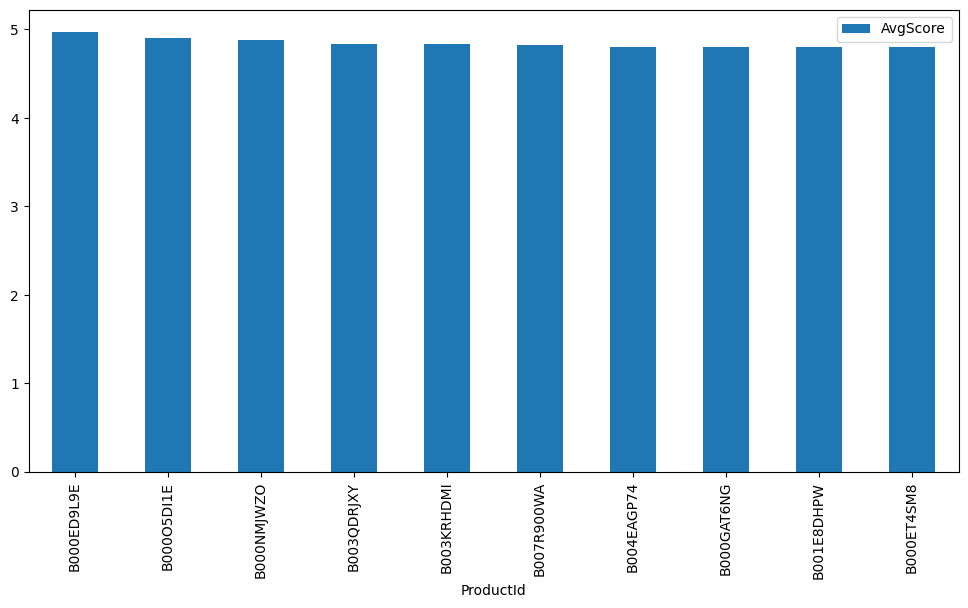

In [11]:
df_top50.head(10).plot(
    x="ProductId",
    y="AvgScore",
    kind="bar",
    figsize=(12,6)
)


In [ ]:
df_top50.to_csv("top50_products.csv", index=False)
